<a href="https://colab.research.google.com/github/geriiy/PCVK_Ganjil_2025/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow  # for image display
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pylab as plt

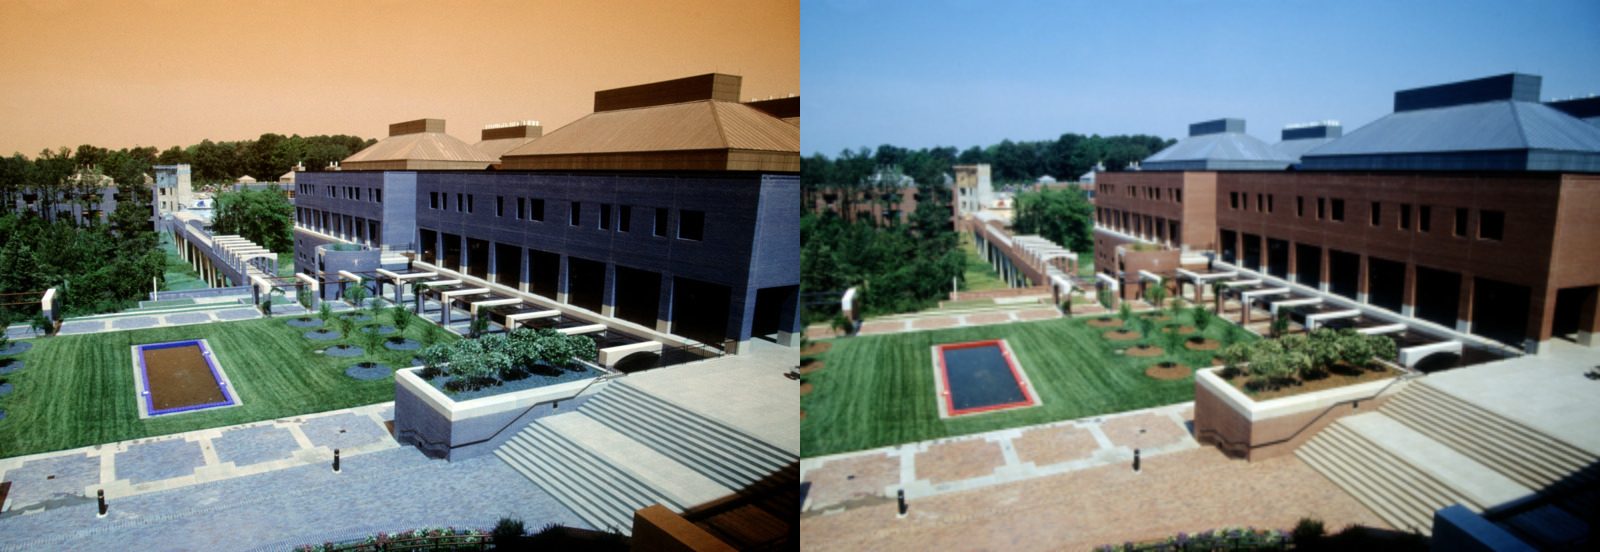

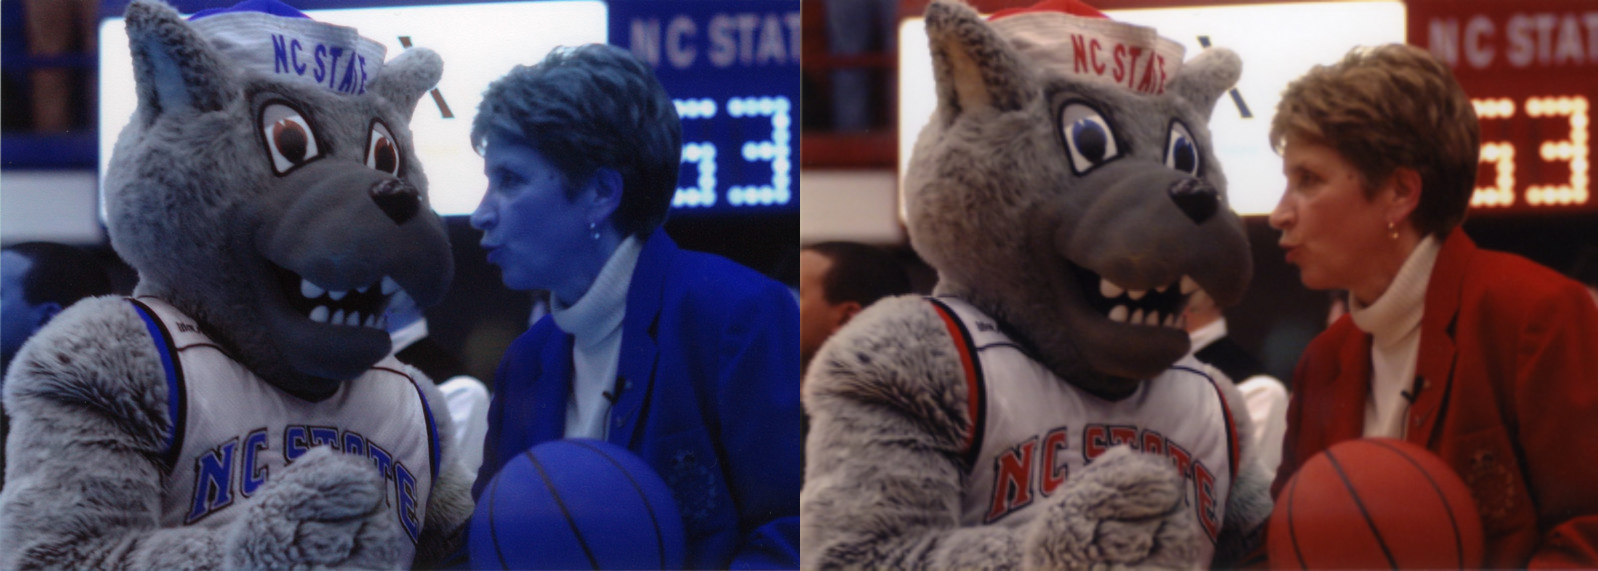

In [7]:
# Membuat list untuk menyimpan url dari beberapa image
urls = [
    "https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
    "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg"
]

# baca dan tampilkan image
# loop pada tiap url image, beberapa image dapat disimpan pada list
for url in urls:
    image = io.imread(url)                          # read image
    image_2 = cv.resize(image, (0,0), fx=0.5, fy=0.5)  # resize image to half size
    # Resize image_2 to match the height of image
    image_2 = cv.resize(image_2, (int(image_2.shape[1] * image.shape[0] / image_2.shape[0]), image.shape[0]))
    image_2 = cv.cvtColor(image_2, cv.COLOR_BGR2RGB)  # convert color to RGB
    final_frame = cv.hconcat([image, image_2])        # concatenate image
    cv2_imshow(final_frame)                           # show image
    print('\n')

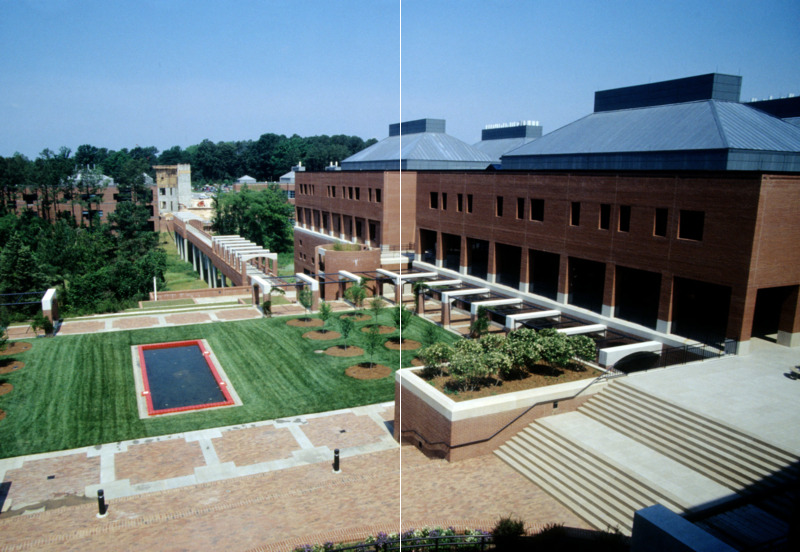

In [13]:
# Ambil gambar pertama dari list urls
url = urls[0]

try:
    # Ambil gambar
    image = io.imread(url)

    # Ubah ke RGB (jika belum dalam format RGB)
    if len(image.shape) == 3:
        image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    else:
        image_rgb = cv.cvtColor(image, cv.COLOR_GRAY2RGB)


    # Tambahkan garis vertikal di tengah
    tinggi, lebar, _ = image_rgb.shape
    # Ensure the line is within image bounds
    line_pos = int(lebar / 2)
    if line_pos < lebar:
        image_rgb[:, line_pos] = [255, 255, 255]  # warna putih

    # Tampilkan gambar dengan garis vertikal
    cv2_imshow(image_rgb)
    print('\n')
except Exception as e:
    print(f"Error processing {url}: {e}")

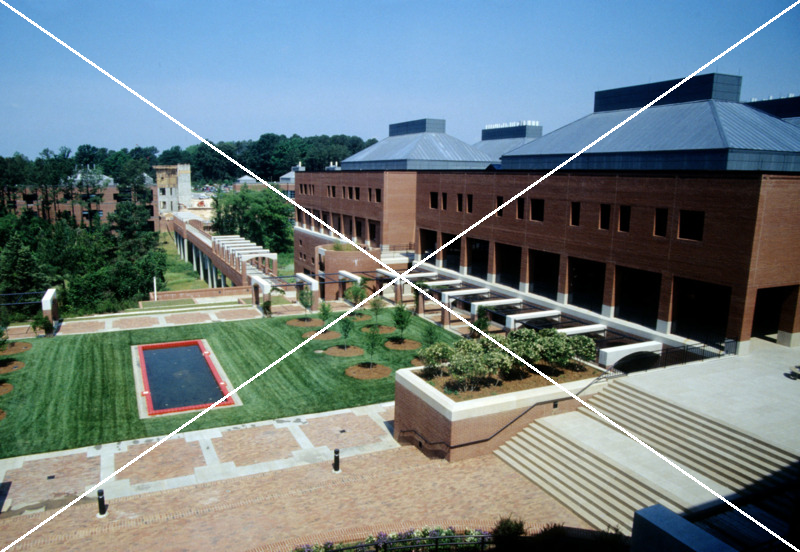

In [14]:
# Ambil gambar pertama dari list urls
url = urls[0]
image = io.imread(url)

# Ubah gambar menjadi RGB (jika belum dalam format RGB)
if len(image.shape) == 3:
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
else:
    image_rgb = cv.cvtColor(image, cv.COLOR_GRAY2RGB)


# Tentukan koordinat untuk garis diagonal pertama (dari kiri atas ke kanan bawah)
height, width, _ = image_rgb.shape
start_point_1 = (0, 0)
end_point_1 = (width, height)

# Tentukan koordinat untuk garis diagonal kedua (dari kanan atas ke kiri bawah)
start_point_2 = (width, 0)
end_point_2 = (0, height)

# Tentukan warna dan ketebalan garis (warna putih, ketebalan 2)
color = (255, 255, 255)
thickness = 2

# Gambar garis diagonal pertama pada gambar
image_with_lines = cv.line(image_rgb.copy(), start_point_1, end_point_1, color, thickness)

# Gambar garis diagonal kedua pada gambar yang sudah ada garis pertama
image_with_lines = cv.line(image_with_lines, start_point_2, end_point_2, color, thickness)

# Tampilkan gambar dengan kedua garis diagonal
cv2_imshow(image_with_lines)